In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.font_manager import FontProperties
import os

In [2]:
#os.chdir("C:\\Users\\zhang\\Dropbox\\Researches\\180410BT")#windows
os.chdir("/home/zijian/Dropbox/Researches/180410BT")#Linux

In [3]:
At="113"

In [4]:
DrySepIndex=pd.read_csv("SepTime.csv")

In [5]:
#os.chdir("C:\\Users\\zhang\\Dropbox\\Researches\\180410BT\\cdte")#windows
os.chdir("/home/zijian/Dropbox/Researches/180410BT/cdte")#Linux
data = pd.read_csv('target%s.csv'%At,skiprows =5)

In [6]:
DrySepIndex2=DrySepIndex.set_index("target")
DF=DrySepIndex2.T
DF

target,164a,153,69,174a,154,146,113
start,2018/4/10 19:56,2018/4/11 10:25,2018/4/11 13:40,2018/4/11 15:03,2018/4/11 17:24,2018/4/12 10:20,2018/4/12 15:41
max,2018/4/10 20:09,2018/4/11 10:30,2018/4/11 13:55,2018/4/11 15:13,2018/4/11 17:37,2018/4/12 10:34,2018/4/12 15:55
end,2018/4/10 20:15,2018/4/11 11:00,2018/4/11 14:15,2018/4/11 15:16,2018/4/11 18:10,2018/4/12 11:14,2018/4/12 14:24


In [7]:
timelist=DF["%s"%At]

In [8]:
timelist=pd.to_datetime(timelist)

In [9]:
data.columns=["TIM","MIN","CPS"]#列名を簡単なものに変換

data["TIM"]=pd.to_datetime(data["TIM"])

Time=data["TIM"].values
CPS=data["CPS"].values
CPS=CPS.astype(float)

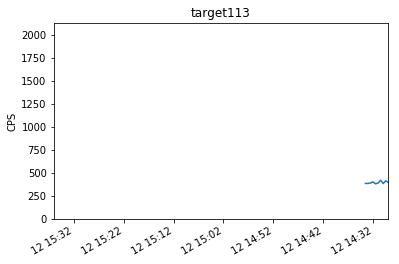

In [10]:
plt.plot(Time,CPS)
plt.axvline(x=timelist[0], color='red',linewidth=0.5)
plt.axvline(x=timelist[1], color='green',linewidth=0.5)
plt.axvline(x=timelist[2], color='b',linewidth=0.5)

start=timelist[0]-datetime.timedelta(minutes=5)
end=timelist[2]+datetime.timedelta(minutes=5)

plt.title("target%s"%At)
plt.ylabel("CPS")
plt.xlim(start,end)
plt.gcf().autofmt_xdate()


plt.show()

In [11]:
os.chdir("/home/zijian/Dropbox/Researches/180410BT/temp")#Linux
data2 = pd.read_csv("At%s.csv"%At,skiprows=29,encoding="shift-jis")

In [12]:
Loger_Time=pd.to_datetime(data2["Time"],format="%Y-%m-%d %H:%M:%S")
kanjyo=data2["ﾟC.1"]

over800=np.nonzero(kanjyo>800)
first_index=over800[0][0]

over800_time=Loger_Time[first_index]

CdTe_time=pd.to_datetime(data["TIM"])

start_time=np.nonzero(CdTe_time>over800_time)
ST_index=start_time[0][0]


ROI_time=CdTe_time[ST_index:]
ROI_cps=data["CPS"][ST_index:]

In [13]:

delta=[]
for i in range(len(ROI_cps)-1):
    a0=np.array(ROI_cps)[i]
    a1=np.array(ROI_cps)[i+1]
    #print((a1-a0)/a1)
    delta.append((a1-a0)/a1)
    
TandF=np.array(delta)<0.01

pool=0
counter=0

for i in TandF:
    if i==True:
        pool+=1
        counter+=1
    if i==False:
        pool=0
        counter+=1
    if pool==4:
        break

print(counter)

9


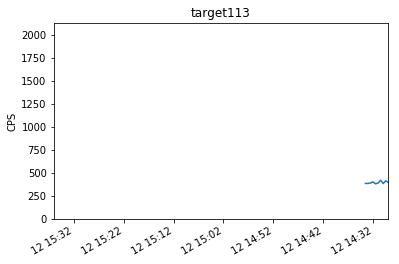

In [14]:
end_time=np.array(ROI_time)[counter]

plt.plot(Time,CPS)
plt.axvline(x=end_time,color="black",ls="dashed")

plt.axvline(x=timelist[0], color='red',linewidth=0.5)
plt.axvline(x=timelist[1], color='green',linewidth=0.5)
plt.axvline(x=timelist[2], color='b',linewidth=0.5)

start=timelist[0]-datetime.timedelta(minutes=5)
end=timelist[2]+datetime.timedelta(minutes=5)

plt.title("target%s"%At)
plt.ylabel("CPS")
plt.xlim(start,end)
plt.gcf().autofmt_xdate()

plt.savefig("/home/zijian/Dropbox/Researches/180410BT/images/At%s.png"%At)